In [34]:
import pandas as pd
import pickle

# Load trips_that_didnt_go_anywhere from CSV
trips_that_didnt_go_anywhere = pd.read_csv('otp_trips_data_for_bikes\\trips_that_didnt_go_anywhere.csv')

# Load trips_that_went_somewhere from pickle
with open('otp_trips_data_for_bikes\\trips_that_went_somewhere.pkl', 'rb') as f:
    trips_that_went_somewhere = pickle.load(f)

# Load other_errors from pickle
with open('otp_trips_data_for_bikes\\other_errors.pkl', 'rb') as f:
    other_errors = pickle.load(f)

In [35]:
# Top 10 rows from trips_that_didnt_go_anywhere DataFrame
print("Top 10 trips_that_didnt_go_anywhere:")
display(trips_that_didnt_go_anywhere.head(10))

# # Top 10 elements from trips_that_went_somewhere (list of tuples)
# print("Top 10 trips_that_went_somewhere:")
# for i, item in enumerate(trips_that_went_somewhere[:10]):
#     print(f"{i+1}: {item}")

# # Top 10 elements from other_errors (list of tuples)
# print("Top 10 other_errors:")
# for i, item in enumerate(other_errors[:10]):
#     print(f"{i+1}: {item}")

Top 10 trips_that_didnt_go_anywhere:


,bike_id,from_station,from_station_lat,from_station_lng,to_station,to_station_lat,to_station_lng,departure_time,arrival_time
0,612804,Branickiego - Ledóchowskiej,52.155439,21.073689,Branickiego - Ledóchowskiej,52.155439,21.073689,2025-04-02 19:44:13,2025-04-02 19:46:16
1,613206,Rondo Wiatraczna,52.244564,21.083806,Rondo Wiatraczna,52.244564,21.083806,2025-04-02 19:44:13,2025-04-02 19:46:16
2,613345,Szaserów – Garwolińska,52.249684,21.092105,Szaserów – Garwolińska,52.249684,21.092105,2025-04-02 19:44:13,2025-04-02 19:46:16
3,613487,Żelazna - Chłodna,52.237314,20.988849,Żelazna - Chłodna,52.237314,20.988849,2025-04-02 19:45:14,2025-04-02 19:47:18
4,612403,Plac Na Rozdrożu,52.219962,21.025830,Plac Na Rozdrożu,52.219962,21.025830,2025-04-02 19:44:13,2025-04-02 19:47:18
5,613247,Czerniakowska- Szwoleżerów,52.215851,21.046341,Czerniakowska- Szwoleżerów,52.215851,21.046341,2025-04-02 19:47:18,2025-04-02 19:49:21
6,612648,Stryjeńskich - Belgradzka,52.137604,21.050553,Stryjeńskich - Belgradzka,52.137604,21.050553,2025-04-02 19:47:18,2025-04-02 19:49:21
7,612934,Park Kultury w Powsinie,52.116250,21.087655,Park Kultury w Powsinie,52.116250,21.087655,2025-04-02 19:48:20,2025-04-02 19:50:23
8,613429,Książęca - Rozbrat,52.230087,21.030236,Książęca - Rozbrat,52.230087,21.030236,2025-04-02 19:48:20,2025-04-02 19:50:23
9,612885,Metro Stokłosy,52.156867,21.033840,Metro Stokłosy,52.156867,21.033840,2025-04-02 19:46:16,2025-04-02 19:50:23


In [36]:
warsaw_bike_movements = pd.read_csv('..\\bike_movements_warsaw.csv')

In [37]:
def get_unique_from_stations(df):
    """
    Extract unique destinations from the 'destination' column of the DataFrame.
    """
    return df['from_station'].unique()

In [38]:
print(f"Number of unique station names {len(warsaw_bike_movements['from_station'].unique())}")

unique_from_station_coords = warsaw_bike_movements[['from_station_lat', 'from_station_lng']].drop_duplicates()
num_unique_from_station_coords = len(unique_from_station_coords)
print("Number of unique (from_station_lat, from_station_lng) combinations:", num_unique_from_station_coords)

Number of unique station names 343
Number of unique (from_station_lat, from_station_lng) combinations: 343


In [39]:
# Create a dictionary that maps (from_station_lat, from_station_lng) to from_station name
location_to_station = {}
station_to_location = {}
def create_station_location_mapping(df):
    for _, row in df.iterrows():
        key = (row['from_station_lat'], row['from_station_lng'])
        # Only set if not already present to avoid overwriting with possibly different names for same coords
        if key not in location_to_station:
            location_to_station[key] = row['from_station']

    for key, station in location_to_station.items():
        station_to_location[station] = key
    return location_to_station, station_to_location

In [40]:
location_to_station, station_to_location = create_station_location_mapping(warsaw_bike_movements)

for loc, name in list(location_to_station.items())[:5]:
    print(f"Location: {loc} -> Station Name: {name}")

Location: (52.230978, 21.003676) -> Station Name: Emilii Plater - Złota
Location: (52.155439, 21.073689) -> Station Name: Branickiego - Ledóchowskiej
Location: (52.244564, 21.083806) -> Station Name: Rondo Wiatraczna
Location: (52.249684, 21.092105) -> Station Name: Szaserów – Garwolińska
Location: (52.237314, 20.988849) -> Station Name: Żelazna - Chłodna


In [41]:
from scipy.stats import zscore

# Compute z-scores for station coordinates
coords = unique_from_station_coords[['from_station_lat', 'from_station_lng']].values
z_scores = zscore(coords)

# Calculate the Euclidean norm of the z-scores for each station
z_norm = np.linalg.norm(z_scores, axis=1)

# Define a threshold for outliers (commonly 3 standard deviations)
threshold = 3
outlier_indices = np.where(z_norm > threshold)[0]

# Get outlier stations
outlier_stations = unique_from_station_coords.iloc[outlier_indices]
print("Outlier stations based on location:")
display(outlier_stations)

Outlier stations based on location:


,from_station_lat,from_station_lng
191983,41.371631,2.127232
191984,41.423345,2.205672
191986,41.386602,2.116364
191993,41.386799,2.116236
192012,41.413419,2.221750
192018,41.448479,2.199556


In [42]:
# Get the names of stations corresponding to the outlier coordinates
outlier_coords = [tuple(x) for x in outlier_stations[['from_station_lat', 'from_station_lng']].values]
outlier_names = [location_to_station.get(coord, None) for coord in outlier_coords]
print("Outlier station names:")
for name, coord in zip(outlier_names, outlier_coords):
    print(f"{name} at {coord}")

Outlier station names:
AMB - Riera Blanca Nord at (41.371631, 2.127232)
AMB - METRO La Pau at (41.423345, 2.205672)
AMB - Diagonal I at (41.386602, 2.116364)
AMB - Diagonal II at (41.386799, 2.116236)
AMB - Campus Diagonal - Besòs at (41.413419, 2.22175)
AMB - METRO Baró de Viver at (41.448479, 2.199556)


In [43]:
# # Identify outlier and normal station coordinates
# outlier_coords_set = set([tuple(x) for x in outlier_stations[['from_station_lat', 'from_station_lng']].values])
# normal_coords_set = set([tuple(x) for x in unique_from_station_coords[['from_station_lat', 'from_station_lng']].values]) - outlier_coords_set

# # Find trips where either from_station or to_station is an outlier and the other is normal
# def is_outlier(coord):
#     return tuple(coord) in outlier_coords_set

# def is_normal(coord):
#     return tuple(coord) in normal_coords_set

# # Filter trips
# trips_between_outlier_and_normal = warsaw_bike_movements[
#     (
#         warsaw_bike_movements.apply(
#             lambda row: (is_outlier([row['from_station_lat'], row['from_station_lng']]) and is_normal([row['to_station_lat'], row['to_station_lng']])) or
#                         (is_normal([row['from_station_lat'], row['from_station_lng']]) and is_outlier([row['to_station_lat'], row['to_station_lng']])),
#             axis=1
#         )
#     )
# ]

# print(f"Number of trips between outlier and normal stations: {len(trips_between_outlier_and_normal)}")
# display(trips_between_outlier_and_normal.head(10))

In [44]:
no_outlier_stations_coords = [x for x in location_to_station.keys() if x not in outlier_coords]
print(len(no_outlier_stations_coords), "stations without outliers")
print(len((list(location_to_station.keys()))))

337 stations without outliers
343


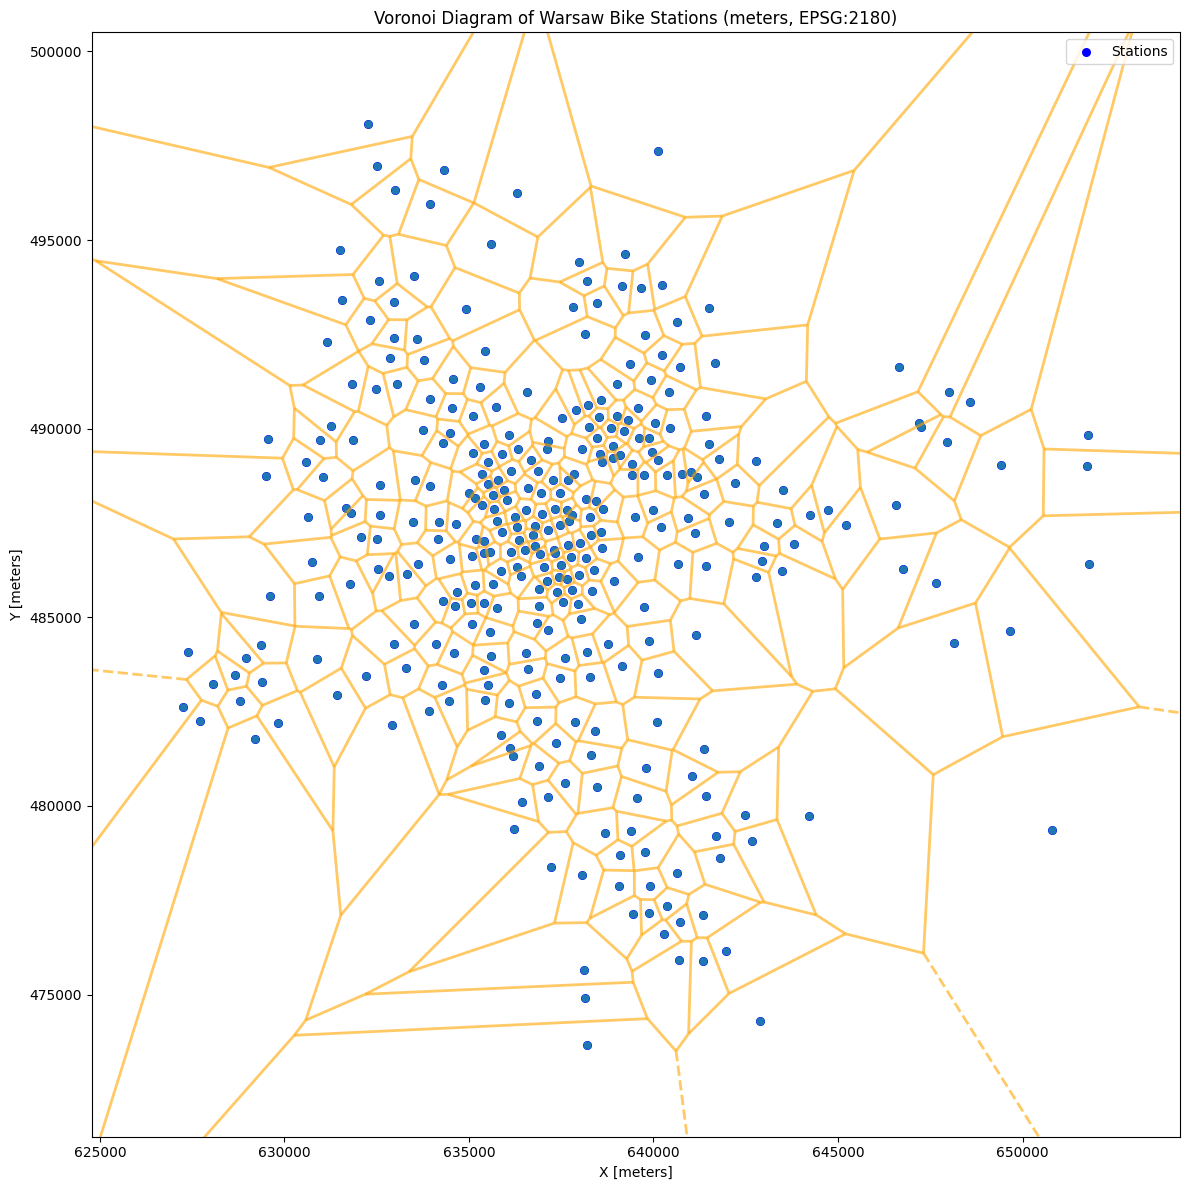

In [45]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
from pyproj import Transformer

# Prepare station coordinates for Voronoi (convert lat/lng to meters using EPSG:2180 - Poland CS92)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:2180", always_xy=True)
coords_deg = np.array(no_outlier_stations_coords)
lngs = coords_deg[:, 1]
lats = coords_deg[:, 0]
xs, ys = transformer.transform(lngs, lats)
coords_m = np.column_stack([xs, ys])

# Create Voronoi diagram in meters
vor = Voronoi(coords_m)

# Plot Voronoi diagram (no station names, just map)
fig, ax = plt.subplots(figsize=(12, 12))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=10)

# Plot station points
ax.scatter(xs, ys, c='blue', s=30, label='Stations')

ax.set_title("Voronoi Diagram of Warsaw Bike Stations (meters, EPSG:2180)")
ax.set_xlabel("X [meters]")
ax.set_ylabel("Y [meters]")
plt.legend()
plt.tight_layout()
plt.show()